# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [170]:
# A bit of setup
%load_ext jupyternotify

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [143]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [151]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.68027207103e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [150]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.79856129989e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [152]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447635e-11
b1 max relative error: 2.738421e-09
W1 max relative error: 3.561318e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.0171496079387


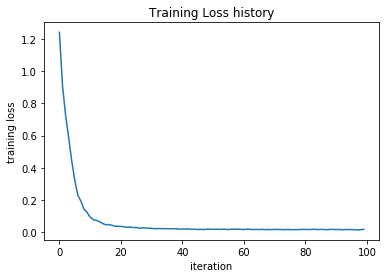

In [100]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [101]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [141]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302998
X.shape (200, 3072)
y_pred shape (200,)
X.shape (1000, 3072)
y_pred shape (1000,)
iteration 50 / 1000: loss 2.302839
iteration 100 / 1000: loss 2.302399
iteration 150 / 1000: loss 2.300832
iteration 200 / 1000: loss 2.298326
X.shape (200, 3072)
y_pred shape (200,)
X.shape (1000, 3072)
y_pred shape (1000,)
iteration 250 / 1000: loss 2.280195
iteration 300 / 1000: loss 2.268330
iteration 350 / 1000: loss 2.206050
iteration 400 / 1000: loss 2.178835
iteration 450 / 1000: loss 2.124939
X.shape (200, 3072)
y_pred shape (200,)
X.shape (1000, 3072)
y_pred shape (1000,)
iteration 500 / 1000: loss 2.201314
iteration 550 / 1000: loss 2.098274
iteration 600 / 1000: loss 2.057809
iteration 650 / 1000: loss 2.068776
iteration 700 / 1000: loss 1.996279
X.shape (200, 3072)
y_pred shape (200,)
X.shape (1000, 3072)
y_pred shape (1000,)
iteration 750 / 1000: loss 2.095586
iteration 800 / 1000: loss 2.040625
iteration 850 / 1000: loss 1.974610
iteration 900 / 1000: loss 

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

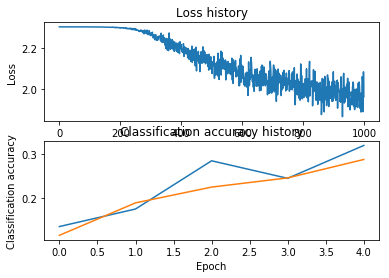

In [106]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.show()

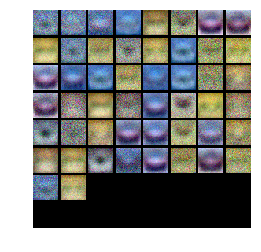

In [104]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [194]:


#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################


# Sanity check
# learning_rates = [1e-7]
# regularization_strengths = [2.5e3]
# hidden_layer_unit_counts = [200]

# Trial 1

# learning_rates = []
# for exponent in range(3, 9):
#     for _ in range(2):
#         learning_rates.append(np.random.uniform(10**(-exponent), 10**(-exponent+1)))

# regularization_strengths = []
# for exponent in range(2, 6):
#     for _ in range(2):
#         regularization_strengths.append(np.random.uniform(10**(exponent), 10**(exponent+1)))
        
# hidden_layer_unit_counts = [200]
# print(learning_rates)
# print(regularization_strengths)
# epochs = 0.2

# End

# Trial 2

# learning_rates = []
# for exponent in range(4, 8):
#     for _ in range(2):
#         learning_rates.append(np.random.uniform(10**(-exponent), 10**(-exponent+1)))

# regularization_strengths = []
# for exponent in range(2, 5):
#     for _ in range(1):
#         regularization_strengths.append(np.random.uniform(10**(exponent), 10**(exponent+1)))
        
# hidden_layer_unit_counts = [200]
# print(learning_rates)
# print(regularization_strengths)
# epochs = 0.2

# End

# Trial 3

# learning_rates = []
# for exponent in range(3, 6):
#     for _ in range(3):
#         learning_rates.append(np.random.uniform(10**(-exponent), 10**(-exponent+1)))

# regularization_strengths = []
# for exponent in range(2, 4):
#     for _ in range(3):
#         regularization_strengths.append(np.random.uniform(10**(exponent), 10**(exponent+1)))
        
# hidden_layer_unit_counts = [200]
# print(learning_rates)
# print(regularization_strengths)
# epochs = 0.2

# End

# Trial 4

# learning_rates = []
# for exponent in range(3, 7):
#     for _ in range(2):
#         learning_rates.append(np.random.uniform(10**(-exponent), 10**(-exponent+1)))

# regularization_strengths = []
# for exponent in range(-2, 2):
#     for _ in range(2):
#         regularization_strengths.append(np.random.uniform(10**(exponent), 10**(exponent+1)))
        
# hidden_layer_unit_counts = [200]
# print(learning_rates)
# print(regularization_strengths)
# epochs = 1.6
# dropout = 0.5

# End


def train(hidden_layer_unit_count,
           num_iters,
           learning_rate,
           regularization_strength,
           dropout=None):
    
    input_size = 32 * 32 * 3
    num_classes = 10
    
    print(f'training with lr: {learning_rate}, reg: {regularization_strength}, and hidden: {hidden_layer_unit_count}')
    net = TwoLayerNet(input_size,
                      hidden_layer_unit_count,
                      num_classes)
    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
                      num_iters=num_iters,
                      batch_size=200,
                      learning_rate=learning_rate, 
                      learning_rate_decay=0.95,
                      reg=regularization_strength, 
                      verbose=True, 
                      dropout=dropout)
    return (net, stats)
    
def run_training(hidden_layer_unit_counts,
                 regularization_strengths,
                 learning_rates,
                 epochs,
                 dropout):
    best_net = None # store the best model into this 
    best_stats = None
    best_val_acc = -1

    batch_size = 200
    num_iters_for_epoch = max(len(X_train) / batch_size, 1)
    num_iters = int(num_iters_for_epoch * epochs)
    results = {}

    for hidden_layer_unit_count in hidden_layer_unit_counts:
        for regularization_strength in regularization_strengths:
            for learning_rate in learning_rates:
                net, stats = train(hidden_layer_unit_count,
                       num_iters,
                       learning_rate,
                       regularization_strength,
                       dropout=dropout)
                val_acc = stats['val_acc_history'][-1]    
                if best_val_acc < val_acc:
                    best_val_acc = val_acc
                    best_net = net
                    best_stats = stats

                train_acc = stats['train_acc_history'][-1]

                results[(learning_rate, regularization_strength)] = (train_acc, val_acc)

    plt.subplot(2, 1, 1)
    plt.plot(best_stats['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(best_stats['train_acc_history'], label='train')
    plt.plot(best_stats['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Classification accuracy')
    plt.show()

    print("best val acc:", best_val_acc)
    for lr, reg in sorted(results):
        train_accuracy, val_accuracy = results[(lr, reg)]
        print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                    lr, reg, train_accuracy, val_accuracy))
    return (best_net, best_stats, best_val_acc)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

[0.003311056328040821, 0.0024596278520743983, 0.0022536470466594837, 0.0038095383078845958, 0.0031737518816545027]
[0.5052490967806669, 0.47709864755278253, 0.7518957638546621, 0.9359100105135014]
training with lr: 0.003311056328040821, reg: 0.5052490967806669, and hidden: 200
iteration 0 / 367: loss 2.305709
iteration 50 / 367: loss 1.924199
iteration 100 / 367: loss 2.085281
iteration 150 / 367: loss 2.056536
iteration 200 / 367: loss 2.201612
iteration 250 / 367: loss 1.933700
iteration 300 / 367: loss 1.993779
iteration 350 / 367: loss 1.978546
training with lr: 0.0024596278520743983, reg: 0.5052490967806669, and hidden: 200
iteration 0 / 367: loss 2.305735
iteration 50 / 367: loss 1.924660
iteration 100 / 367: loss 1.872943
iteration 150 / 367: loss 1.854141
iteration 200 / 367: loss 1.906633
iteration 250 / 367: loss 1.860913
iteration 300 / 367: loss 1.861142
iteration 350 / 367: loss 1.830834
training with lr: 0.0022536470466594837, reg: 0.5052490967806669, and hidden: 200
iter

/Users/jin/workspace/learning/stanford/cs231n/assignments/assignment1/cs231n/classifiers/neural_net.py:110: RuntimeWarning: divide by zero encountered in log
  losses = -np.log(exp_ratios)
/Users/jin/workspace/learning/stanford/cs231n/assignments/assignment1/cs231n/classifiers/neural_net.py:131: RuntimeWarning: divide by zero encountered in true_divide
  grad_ln = 1 / exp_ratios
/Users/jin/workspace/learning/stanford/cs231n/assignments/assignment1/cs231n/classifiers/neural_net.py:131: RuntimeWarning: overflow encountered in true_divide
  grad_ln = 1 / exp_ratios
/Users/jin/workspace/learning/stanford/cs231n/assignments/assignment1/cs231n/classifiers/neural_net.py:143: RuntimeWarning: invalid value encountered in multiply
  dExpPreDot = dln * grad_label_exps_multiply * grad_exp
/Users/jin/workspace/learning/stanford/cs231n/assignments/assignment1/cs231n/classifiers/neural_net.py:155: RuntimeWarning: invalid value encountered in multiply
  dSum = dln * grad_label_exps_multiply * grad_fli

iteration 250 / 367: loss nan
iteration 300 / 367: loss nan
iteration 350 / 367: loss nan
training with lr: 0.0031737518816545027, reg: 0.7518957638546621, and hidden: 200
iteration 0 / 367: loss 2.307299
iteration 50 / 367: loss 2.003072
iteration 100 / 367: loss 1.847157
iteration 150 / 367: loss 1.810168
iteration 200 / 367: loss 1.992604
iteration 250 / 367: loss 2.047911
iteration 300 / 367: loss 2.088541
iteration 350 / 367: loss 1.845403
training with lr: 0.003311056328040821, reg: 0.9359100105135014, and hidden: 200
iteration 0 / 367: loss 2.308318
iteration 50 / 367: loss 2.123376
iteration 100 / 367: loss 2.154236
iteration 150 / 367: loss 2.364495
iteration 200 / 367: loss 2.127937
iteration 250 / 367: loss 1.945283
iteration 300 / 367: loss 1.910910
iteration 350 / 367: loss 2.127722
training with lr: 0.0024596278520743983, reg: 0.9359100105135014, and hidden: 200
iteration 0 / 367: loss 2.308325
iteration 50 / 367: loss 1.911374
iteration 100 / 367: loss 1.915489
iteration

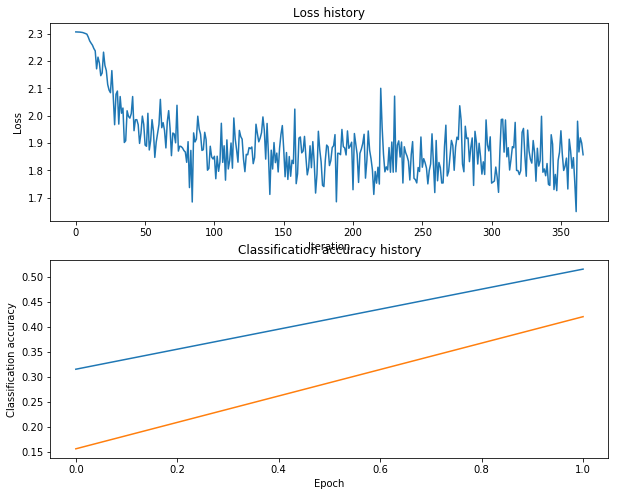

lr 2.253647e-03 reg 4.770986e-01 train accuracy: 0.520000 val accuracy: 0.402000
lr 2.253647e-03 reg 5.052491e-01 train accuracy: 0.505000 val accuracy: 0.416000
lr 2.253647e-03 reg 7.518958e-01 train accuracy: 0.515000 val accuracy: 0.420000
lr 2.253647e-03 reg 9.359100e-01 train accuracy: 0.555000 val accuracy: 0.408000
lr 2.459628e-03 reg 4.770986e-01 train accuracy: 0.495000 val accuracy: 0.356000
lr 2.459628e-03 reg 5.052491e-01 train accuracy: 0.540000 val accuracy: 0.373000
lr 2.459628e-03 reg 7.518958e-01 train accuracy: 0.515000 val accuracy: 0.389000
lr 2.459628e-03 reg 9.359100e-01 train accuracy: 0.550000 val accuracy: 0.390000
lr 3.173752e-03 reg 4.770986e-01 train accuracy: 0.520000 val accuracy: 0.339000
lr 3.173752e-03 reg 5.052491e-01 train accuracy: 0.435000 val accuracy: 0.300000
lr 3.173752e-03 reg 7.518958e-01 train accuracy: 0.465000 val accuracy: 0.361000
lr 3.173752e-03 reg 9.359100e-01 train accuracy: 0.485000 val accuracy: 0.383000
lr 3.311056e-03 reg 4.770986

<IPython.core.display.Javascript object>

In [177]:

# Trial 5

learning_rates = []
mid_lr = 3.265407e-03
for _ in range(5):
    learning_rates.append(np.random.uniform(mid_lr * 0.5, mid_lr * 1.5))

regularization_strengths = []
mid_reg = 7.783813e-01
for _ in range(4):
    regularization_strengths.append(np.random.uniform(mid_reg * 0.5, mid_reg * 1.3))
        
hidden_layer_unit_counts = [200]
print(learning_rates)
print(regularization_strengths)
epochs = 1.5
dropout = 0.5

run_training(hidden_layer_unit_counts,
             regularization_strengths,
             learning_rates,
             epochs,
             dropout)
# End
%notify


# lr 3.265407e-03 reg 1.860348e-01 train accuracy: 0.480000 val accuracy: 0.347000
# lr 3.265407e-03 reg 7.783813e-01 train accuracy: 0.520000 val accuracy: 0.355000

[0.0019128234103503795, 0.0021275826864320386, 0.0023508917422330115, 0.0022774116545612316, 0.0016794870085238504]
[0.6547516223465162, 0.571402049872305, 0.5461399045786243]
training with lr: 0.0019128234103503795, reg: 0.6547516223465162, and hidden: 200
iteration 0 / 490: loss 2.306625
iteration 50 / 490: loss 2.010683
iteration 100 / 490: loss 1.822027
iteration 150 / 490: loss 1.748066
iteration 200 / 490: loss 1.801297
iteration 250 / 490: loss 2.070938
iteration 300 / 490: loss 1.924328
iteration 350 / 490: loss 1.766923
iteration 400 / 490: loss 1.740405
iteration 450 / 490: loss 1.749877
training with lr: 0.0021275826864320386, reg: 0.6547516223465162, and hidden: 200
iteration 0 / 490: loss 2.306572
iteration 50 / 490: loss 1.892377
iteration 100 / 490: loss 1.863749
iteration 150 / 490: loss 1.921911
iteration 200 / 490: loss 1.824964
iteration 250 / 490: loss 1.844912
iteration 300 / 490: loss 1.763528
iteration 350 / 490: loss 1.796181
iteration 400 / 490: loss 1.762002
i

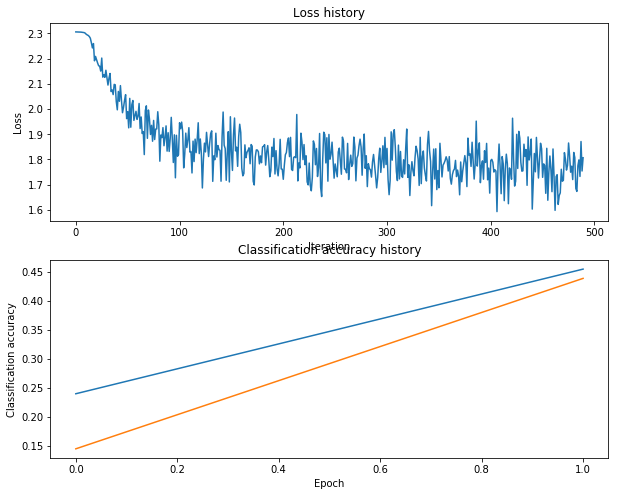

lr 1.679487e-03 reg 5.461399e-01 train accuracy: 0.495000 val accuracy: 0.406000
lr 1.679487e-03 reg 5.714020e-01 train accuracy: 0.455000 val accuracy: 0.439000
lr 1.679487e-03 reg 6.547516e-01 train accuracy: 0.385000 val accuracy: 0.389000
lr 1.912823e-03 reg 5.461399e-01 train accuracy: 0.445000 val accuracy: 0.404000
lr 1.912823e-03 reg 5.714020e-01 train accuracy: 0.505000 val accuracy: 0.431000
lr 1.912823e-03 reg 6.547516e-01 train accuracy: 0.510000 val accuracy: 0.413000
lr 2.127583e-03 reg 5.461399e-01 train accuracy: 0.485000 val accuracy: 0.408000
lr 2.127583e-03 reg 5.714020e-01 train accuracy: 0.490000 val accuracy: 0.385000
lr 2.127583e-03 reg 6.547516e-01 train accuracy: 0.505000 val accuracy: 0.417000
lr 2.277412e-03 reg 5.461399e-01 train accuracy: 0.490000 val accuracy: 0.414000
lr 2.277412e-03 reg 5.714020e-01 train accuracy: 0.555000 val accuracy: 0.417000
lr 2.277412e-03 reg 6.547516e-01 train accuracy: 0.445000 val accuracy: 0.398000
lr 2.350892e-03 reg 5.461399

<IPython.core.display.Javascript object>

In [178]:
# Trial 6

learning_rates = []
mid_lr = 2.253647e-03
for _ in range(5):
    learning_rates.append(np.random.uniform(mid_lr * 0.7, mid_lr * 1.2))

regularization_strengths = []
mid_reg = 7.518958e-01
for _ in range(3):
    regularization_strengths.append(np.random.uniform(mid_reg * 0.7, mid_reg * 1.1))
        
hidden_layer_unit_counts = [200]
print(learning_rates)
print(regularization_strengths)
epochs = 2
dropout = 0.5

best_net, best_stats, best_val_acc = run_training(hidden_layer_unit_counts,
                                                  regularization_strengths,   
                                                  learning_rates,
                                                  epochs,   
                                                  dropout)
# End
%notify

# lr 2.253647e-03 reg 4.770986e-01 train accuracy: 0.520000 val accuracy: 0.402000
# lr 2.253647e-03 reg 5.052491e-01 train accuracy: 0.505000 val accuracy: 0.416000
# lr 2.253647e-03 reg 7.518958e-01 train accuracy: 0.515000 val accuracy: 0.420000
# lr 2.253647e-03 reg 9.359100e-01 train accuracy: 0.555000 val accuracy: 0.408000

[0.001639489043818596, 0.0013882956715241621, 0.0016319294810815711, 0.0016058009548012417]
[0.47251145922658455, 0.5271612520701378, 0.5199509844925814]
training with lr: 0.001639489043818596, reg: 0.47251145922658455, and hidden: 200
iteration 0 / 735: loss 2.305545
iteration 50 / 735: loss 1.992424
iteration 100 / 735: loss 1.749371
iteration 150 / 735: loss 1.786901
iteration 200 / 735: loss 1.830792
iteration 250 / 735: loss 1.817543
iteration 300 / 735: loss 1.922495
iteration 350 / 735: loss 1.836832
iteration 400 / 735: loss 1.816820
iteration 450 / 735: loss 1.739273
iteration 500 / 735: loss 1.806008
iteration 550 / 735: loss 1.827038
iteration 600 / 735: loss 1.804696
iteration 650 / 735: loss 1.794088
iteration 700 / 735: loss 1.780090
training with lr: 0.0013882956715241621, reg: 0.47251145922658455, and hidden: 200
iteration 0 / 735: loss 2.305476
iteration 50 / 735: loss 2.088005
iteration 100 / 735: loss 1.847967
iteration 150 / 735: loss 1.832779
iteration 200 / 735: l

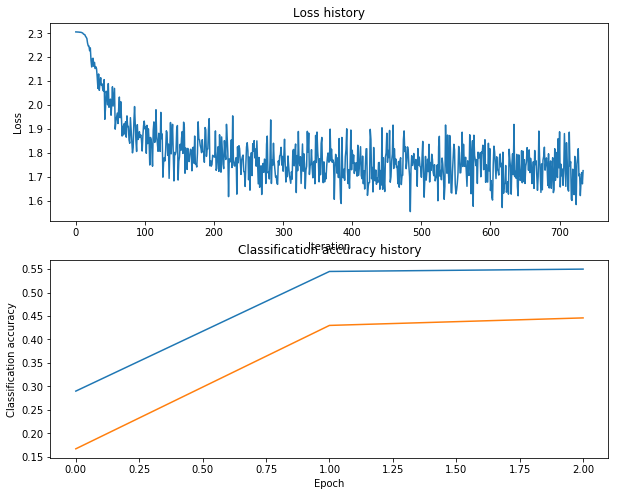

best val acc: 0.446
lr 1.388296e-03 reg 4.725115e-01 train accuracy: 0.525000 val accuracy: 0.433000
lr 1.388296e-03 reg 5.199510e-01 train accuracy: 0.505000 val accuracy: 0.440000
lr 1.388296e-03 reg 5.271613e-01 train accuracy: 0.550000 val accuracy: 0.434000
lr 1.605801e-03 reg 4.725115e-01 train accuracy: 0.550000 val accuracy: 0.446000
lr 1.605801e-03 reg 5.199510e-01 train accuracy: 0.530000 val accuracy: 0.427000
lr 1.605801e-03 reg 5.271613e-01 train accuracy: 0.465000 val accuracy: 0.441000
lr 1.631929e-03 reg 4.725115e-01 train accuracy: 0.530000 val accuracy: 0.438000
lr 1.631929e-03 reg 5.199510e-01 train accuracy: 0.545000 val accuracy: 0.443000
lr 1.631929e-03 reg 5.271613e-01 train accuracy: 0.545000 val accuracy: 0.436000
lr 1.639489e-03 reg 4.725115e-01 train accuracy: 0.485000 val accuracy: 0.425000
lr 1.639489e-03 reg 5.199510e-01 train accuracy: 0.545000 val accuracy: 0.445000
lr 1.639489e-03 reg 5.271613e-01 train accuracy: 0.485000 val accuracy: 0.421000


<IPython.core.display.Javascript object>

In [181]:
# Trial 7

learning_rates = []
mid_lr = 1.679487e-03
for _ in range(4):
    learning_rates.append(np.random.uniform(mid_lr * 0.8, mid_lr * 1.1))

regularization_strengths = []
mid_reg = 5.714020e-01
for _ in range(3):
    regularization_strengths.append(np.random.uniform(mid_reg * 0.8, mid_reg * 1.1))
        
hidden_layer_unit_counts = [200]
print(learning_rates)
print(regularization_strengths)
epochs = 3
dropout = 0.5

best_net, best_stats, best_val_acc = run_training(hidden_layer_unit_counts,
                                                  regularization_strengths,   
                                                  learning_rates,
                                                  epochs,   
                                                  dropout)
# End
%notify

# lr 1.679487e-03 reg 5.714020e-01 train accuracy: 0.455000 val accuracy: 0.439000
# lr 1.912823e-03 reg 5.714020e-01 train accuracy: 0.505000 val accuracy: 0.431000

[0.0016116495190674099, 0.001655831189485911]
[0.46281743361901473, 0.4872775713002301]
training with lr: 0.0016116495190674099, reg: 0.46281743361901473, and hidden: 200
iteration 0 / 980: loss 2.305452
iteration 50 / 980: loss 1.968941
iteration 100 / 980: loss 1.871523
iteration 150 / 980: loss 1.820634
iteration 200 / 980: loss 1.769635
iteration 250 / 980: loss 1.849200
iteration 300 / 980: loss 1.668800
iteration 350 / 980: loss 1.844885
iteration 400 / 980: loss 1.688449
iteration 450 / 980: loss 1.792523
iteration 500 / 980: loss 1.652276
iteration 550 / 980: loss 1.605172
iteration 600 / 980: loss 1.663586
iteration 650 / 980: loss 1.813442
iteration 700 / 980: loss 1.731804
iteration 750 / 980: loss 1.767746
iteration 800 / 980: loss 1.631086
iteration 850 / 980: loss 1.729115
iteration 900 / 980: loss 1.669473
iteration 950 / 980: loss 1.819583
training with lr: 0.001655831189485911, reg: 0.46281743361901473, and hidden: 200
iteration 0 / 980: loss 2.305487
iteration 50 / 98

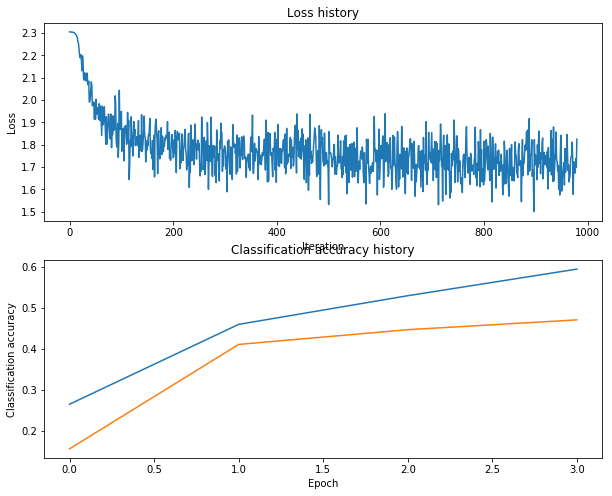

best val acc: 0.471
lr 1.611650e-03 reg 4.628174e-01 train accuracy: 0.535000 val accuracy: 0.454000
lr 1.611650e-03 reg 4.872776e-01 train accuracy: 0.445000 val accuracy: 0.468000
lr 1.655831e-03 reg 4.628174e-01 train accuracy: 0.550000 val accuracy: 0.452000
lr 1.655831e-03 reg 4.872776e-01 train accuracy: 0.595000 val accuracy: 0.471000


<IPython.core.display.Javascript object>

In [182]:
# Trial 8

learning_rates = []
mid_lr = 1.605801e-03
for _ in range(2):
    learning_rates.append(np.random.uniform(mid_lr * 0.95, mid_lr * 1.05))

regularization_strengths = []
mid_reg = 4.725115e-01
for _ in range(2):
    regularization_strengths.append(np.random.uniform(mid_reg * 0.95, mid_reg * 1.05))
        
hidden_layer_unit_counts = [200]
print(learning_rates)
print(regularization_strengths)
epochs = 4
dropout = 0.5

best_net, best_stats, best_val_acc = run_training(hidden_layer_unit_counts,
                                                  regularization_strengths,   
                                                  learning_rates,
                                                  epochs,   
                                                  dropout)
# End
%notify
# lr 1.605801e-03 reg 4.725115e-01 train accuracy: 0.550000 val accuracy: 0.446000

[0.001655831]
[0.4872776]
training with lr: 0.001655831, reg: 0.4872776, and hidden: 200
iteration 0 / 1715: loss 2.305549
iteration 50 / 1715: loss 2.030154
iteration 100 / 1715: loss 1.838442
iteration 150 / 1715: loss 1.956134
iteration 200 / 1715: loss 1.714581
iteration 250 / 1715: loss 1.807788
iteration 300 / 1715: loss 1.708347
iteration 350 / 1715: loss 1.719019
iteration 400 / 1715: loss 1.595121
iteration 450 / 1715: loss 1.680979
iteration 500 / 1715: loss 1.692443
iteration 550 / 1715: loss 1.748537
iteration 600 / 1715: loss 1.644236
iteration 650 / 1715: loss 1.633345
iteration 700 / 1715: loss 1.650672
iteration 750 / 1715: loss 1.931228
iteration 800 / 1715: loss 1.703301
iteration 850 / 1715: loss 1.741499
iteration 900 / 1715: loss 1.660995
iteration 950 / 1715: loss 1.693365
iteration 1000 / 1715: loss 1.608173
iteration 1050 / 1715: loss 1.623250
iteration 1100 / 1715: loss 1.704875
iteration 1150 / 1715: loss 1.517795
iteration 1200 / 1715: loss 1.822384
iteration

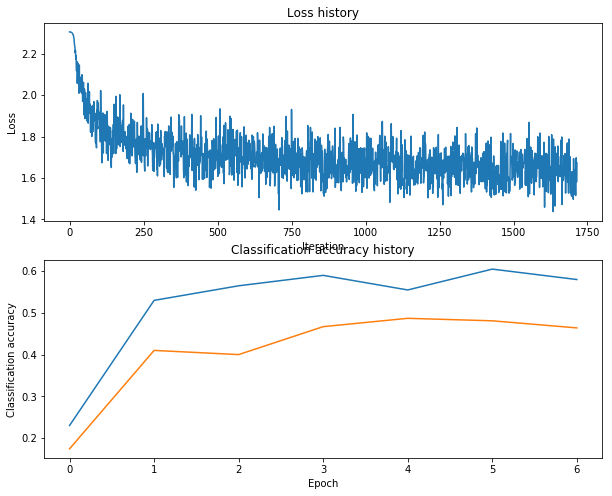

best val acc: 0.464
lr 1.655831e-03 reg 4.872776e-01 train accuracy: 0.580000 val accuracy: 0.464000


<IPython.core.display.Javascript object>

In [188]:
# Trial 9

learning_rates = [1.655831e-03]
# mid_lr = 1.605801e-03
# for _ in range(2):
#     learning_rates.append(np.random.uniform(mid_lr * 0.95, mid_lr * 1.05))

regularization_strengths = [4.872776e-01]
# mid_reg = 4.725115e-01
# for _ in range(2):
#     regularization_strengths.append(np.random.uniform(mid_reg * 0.95, mid_reg * 1.05))
        
hidden_layer_unit_counts = [200]
print(learning_rates)
print(regularization_strengths)
epochs = 7
dropout = 0.6

best_net, best_stats, best_val_acc = run_training(hidden_layer_unit_counts,
                                                  regularization_strengths,   
                                                  learning_rates,
                                                  epochs,   
                                                  dropout)
# End
%notify
# lr 1.655831e-03 reg 4.872776e-01 train accuracy: 0.595000 val accuracy: 0.471000

[0.001655831]
[0.4872776]
training with lr: 0.001655831, reg: 0.4872776, and hidden: 200
iteration 0 / 2450: loss 2.305576
iteration 50 / 2450: loss 1.957182
iteration 100 / 2450: loss 1.744241
iteration 150 / 2450: loss 1.723151
iteration 200 / 2450: loss 1.696783
iteration 250 / 2450: loss 1.751801
iteration 300 / 2450: loss 1.798817
iteration 350 / 2450: loss 1.784888
iteration 400 / 2450: loss 1.714502
iteration 450 / 2450: loss 1.689251
iteration 500 / 2450: loss 1.614803
iteration 550 / 2450: loss 1.542648
iteration 600 / 2450: loss 1.705702
iteration 650 / 2450: loss 1.605259
iteration 700 / 2450: loss 1.526766
iteration 750 / 2450: loss 1.602220
iteration 800 / 2450: loss 1.557307
iteration 850 / 2450: loss 1.668720
iteration 900 / 2450: loss 1.527738
iteration 950 / 2450: loss 1.570274
iteration 1000 / 2450: loss 1.610238
iteration 1050 / 2450: loss 1.628295
iteration 1100 / 2450: loss 1.546905
iteration 1150 / 2450: loss 1.749322
iteration 1200 / 2450: loss 1.542063
iteration

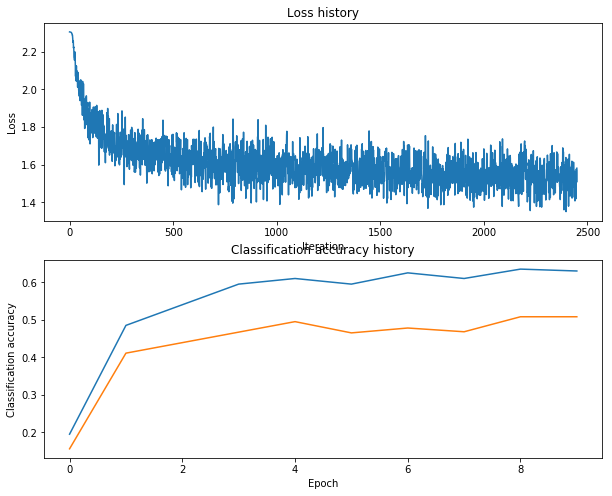

best val acc: 0.508
lr 1.655831e-03 reg 4.872776e-01 train accuracy: 0.630000 val accuracy: 0.508000


<IPython.core.display.Javascript object>

In [204]:
# Trial 10

learning_rates = [1.655831e-03]
regularization_strengths = [4.872776e-01]
hidden_layer_unit_counts = [200]
print(learning_rates)
print(regularization_strengths)
epochs = 10
dropout = 0.9

best_net, best_stats, best_val_acc = run_training(hidden_layer_unit_counts,
                                                  regularization_strengths,   
                                                  learning_rates,
                                                  epochs,   
                                                  dropout)
# End
%notify
# lr 1.655831e-03 reg 4.872776e-01 train accuracy: 0.595000 val accuracy: 0.471000

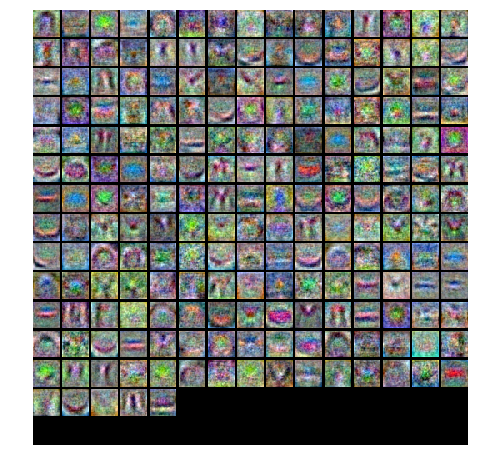

In [205]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [206]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.507
